In [12]:
import torch

In [13]:
from transformers import GPT2LMHeadModel

/opt/anaconda3/envs/neural-nets-ready/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
model_hf = GPT2LMHeadModel.from_pretrained('gpt2') # 124M
sd_hf = model_hf.state_dict()

for k,v in sd_hf.items():
    print(k, v.shape)

/opt/anaconda3/envs/neural-nets-ready/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [4]:
sd_hf['transformer.wpe.weight'].view(-1)[0:10]

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565])

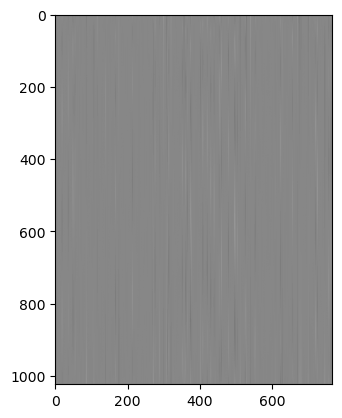

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(sd_hf['transformer.wpe.weight'], cmap = 'gray')

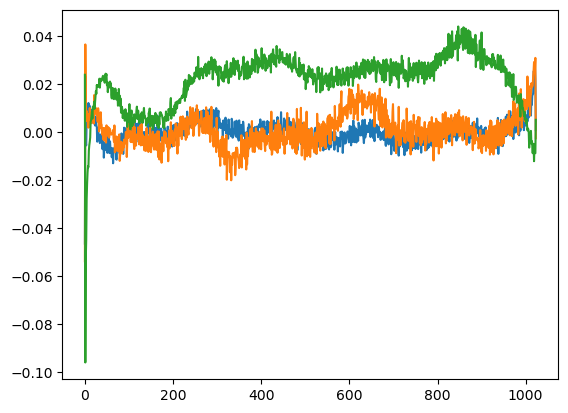

In [11]:
plt.plot(sd_hf['transformer.wpe.weight'][:, 150])
plt.plot(sd_hf['transformer.wpe.weight'][:, 200])
plt.plot(sd_hf['transformer.wpe.weight'][:, 250])

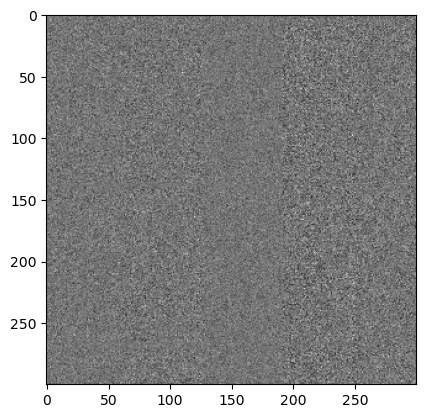

In [13]:
plt.imshow(sd_hf['transformer.h.0.attn.c_attn.weight'][:300, :300], cmap = 'gray')

In [16]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model = 'gpt2')
set_seed(42)

In [17]:
generator("Hello, I'm a large language model, ", max_length = 30, num_return_sequences = 5)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Hello, I\'m a large language model, \xa0But I want it to be \xa0very simple and fast". \xa0 I was not thinking this'},
 {'generated_text': 'Hello, I\'m a large language model, "\n\nA/N: I got a bunch of questions regarding how C++ and the C'},
 {'generated_text': "Hello, I'm a large language model, \xa0and i would really like to play with how this could take a little more time with some tools"},
 {'generated_text': "Hello, I'm a large language model, \xa0or am we? I'm sure you'll have noticed the name of a well known \xa0"},
 {'generated_text': "Hello, I'm a large language model, \xa0and like my design for the first time, I'm going to give you two good reasons not"}]

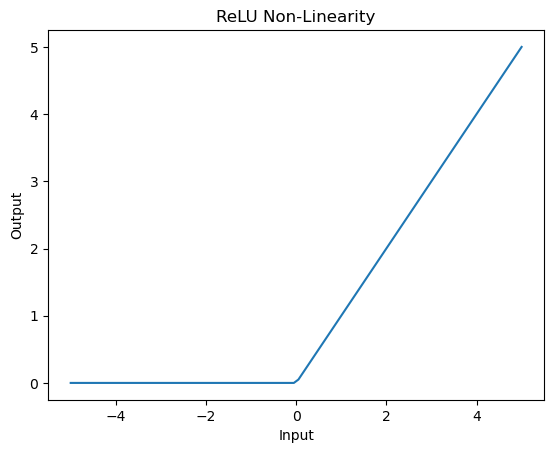

In [18]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 100)
y = np.where(x >= 0, x, 0)

plt.plot(x, y)
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('ReLU Non-Linearity')
plt.show()

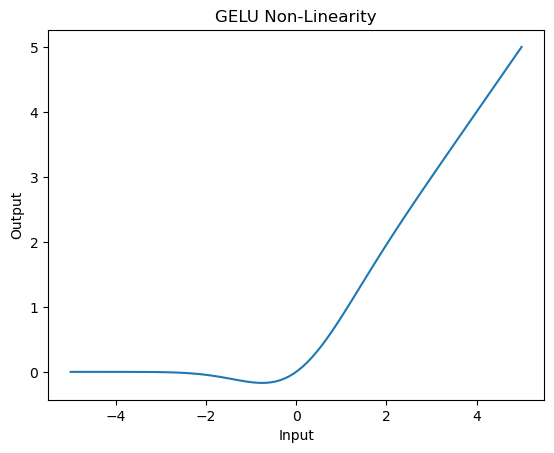

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

x = np.linspace(-5, 5, 100)
y = x * norm.cdf(x)

plt.plot(x, y)
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('GELU Non-Linearity')
plt.show()

In [2]:
!pip3 install pyscreenshot

In [6]:
import torch

x = torch.ones(3,6)

print(f"x.shape: {x.shape}")
print("x:")
print(x)

print("tril(x):")
print(torch.tril(x))

x.shape: torch.Size([3, 6])
x:
tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])
tril(x):
tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.]])


In [7]:
B, C = x.size()

In [8]:
print(B, C)

3 6


In [9]:
x.size(-1)

6

In [14]:
torch.tril(x).view(1, 18)

tensor([[1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.]])

In [7]:
# tiny shakespeare dataset
#wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

with open('input.txt', 'r') as f:
    text = f.read()
data = text[:1000] # first 1,000 characters
print(data[:100])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You


In [8]:
import tiktoken
enc = tiktoken.get_encoding('gpt2')
tokens = enc.encode(data)
print(tokens[:24])

[5962, 22307, 25, 198, 8421, 356, 5120, 597, 2252, 11, 3285, 502, 2740, 13, 198, 198, 3237, 25, 198, 5248, 461, 11, 2740, 13]


In [10]:
import torch
buf = torch.tensor(tokens[:24 + 1])
x = buf[:-1].view(4, 6)
y = buf[1:].view(4,6)
print(x)
print(y)

tensor([[ 5962, 22307,    25,   198,  8421,   356],
        [ 5120,   597,  2252,    11,  3285,   502],
        [ 2740,    13,   198,   198,  3237,    25],
        [  198,  5248,   461,    11,  2740,    13]])
tensor([[22307,    25,   198,  8421,   356,  5120],
        [  597,  2252,    11,  3285,   502,  2740],
        [   13,   198,   198,  3237,    25,   198],
        [ 5248,   461,    11,  2740,    13,   198]])


In [16]:
print(sd_hf['transformer.wte.weight'].shape) # bottom of the transformer
print(sd_hf['lm_head.weight'].shape) # top of the transformer

torch.Size([50257, 768])
torch.Size([50257, 768])


In [19]:
(sd_hf['transformer.wte.weight']==sd_hf['lm_head.weight']).all()

tensor(True)

In [20]:
#https://youtu.be/l8pRSuU81PU?t=4128